In [40]:
# TENSORFLOW BLASICS 
# TensorFlow is an end-to-end platform for machine learning. It supports the following
# Multidimensional array based numeric computation 
# GPU and distributed processing 
# automatic differentiation 
# model construction, training and deployment etc 

In [1]:
import tensorflow as tf 
print(f"Tensor Flow Version: {tf.__version__}")

Tensor Flow Version: 2.9.2


In [2]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)
print(x.shape)
print(x.dtype)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


2023-02-17 18:38:42.810616: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-17 18:38:42.810812: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
# The most important attributes of a tf.Tensor are its shape and dtype
# Tensor.shape: tells you the size of the tensor along each of its axes.
# Tensor.dtype: tells you the type of all the elements in the tensor.

In [4]:
x + x 

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [5]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [6]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [7]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [8]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.665241  ],
       [0.09003057, 0.24472848, 0.665241  ]], dtype=float32)>

In [9]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [10]:
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [11]:
tf.reduce_sum([1,2,3])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [12]:
# RUNNING LARGE CALCS on CPU can be slow 
# tensorcan use the GPU when configured  
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS** using the GPU


In [13]:
# Variables => tf.tensor objects are immutable 
# to store model weights or other mutable state, use tf.Variable objects 
var = tf.Variable([0.0, 0.0, 0.0])
var 

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [14]:
var.assign([1, 2, 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [15]:
var.assign_add([1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [16]:
# AUTOMATIC DIFFERENTIATION 
# GRADIENT DESCENT AND RELATED ALGORITHMS ARE CORNERSTONE OF MODERN ML 
# TensorFlow implements automatic differentiation (autodiff), which uses calculus to compute gradients.
# use this to calculate the gradient of the models error or loss with respect with weights 

x = tf.Variable(1.0) 
def f(x): 
    y = x**2 + 2*x - 5 
    return y 



In [17]:
f(x) 

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

In [18]:
# The derivative of y is y' = f'(x) = (2*x + 2) = 4. TensorFlow can calculate this automatically
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [19]:
# GRAPH and TF.FUNCTION 
@tf.function
def my_func(x):
  print('Tracing.\n')
  return tf.reduce_sum(x)

In [20]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



2023-02-17 18:38:59.404192: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-17 18:38:59.404707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [21]:
# MODULES, LAYERS AND MODELS 
# tf.Module is a class for managing your tf.Variable objects, and the tf.function objects that operate on them. 
# The tf.Module class is necessary to support two significant features

# 1. You can save and restore the values of your variables using tf.train.Checkpoint. This is useful during training as it is 
# quick to save and restore a model's state.

# 2. You can import and export the tf.Variable values and the tf.function graphs using tf.saved_model. 



In [22]:
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self, x):
    return x * self.weight

In [23]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))

2023-02-17 18:39:02.309342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [24]:
# TRAINING LOOPS 
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

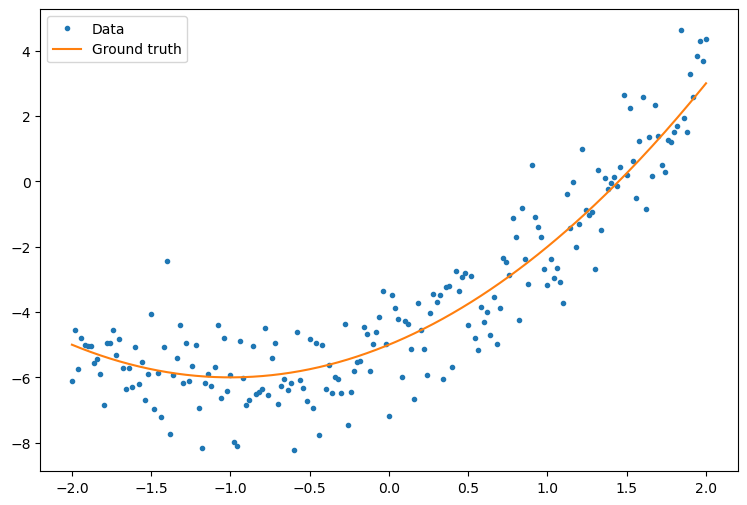

In [25]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

In [26]:
class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])

  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b

In [27]:
quad_model = Model()

In [28]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

2023-02-17 18:39:15.332508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


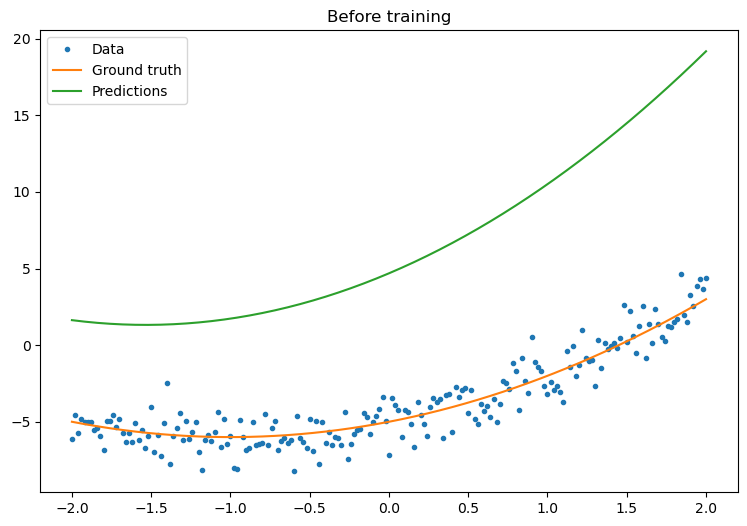

In [29]:
plot_preds(x, y, f, quad_model, 'Before training')

In [30]:
# LOSSES IN THE MODEL 
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [31]:
# Write a basic training loop for the model. The loop will make use of the MSE loss function and 
# its gradients with respect to the input in order to iteratively update the model's parameters.
# Using mini-batches for training provides both memory efficienciy and faster convergence. 
# The tf.data.Dataset API has useful functions for batching and shuffling.

In [32]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

2023-02-17 18:39:29.478589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-17 18:39:29.585250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-17 18:39:29.702302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-17 18:39:29.776562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Mean squared error for step 0: 56.629
Mean squared error for step 10: 10.207
Mean squared error for step 20: 4.275
Mean squared error for step 30: 2.194
Mean squared error for step 40: 1.466
Mean squared error for step 50: 1.214
Mean squared error for step 60: 1.133
Mean squared error for step 70: 1.100
Mean squared error for step 80: 1.088
Mean squared error for step 90: 1.085




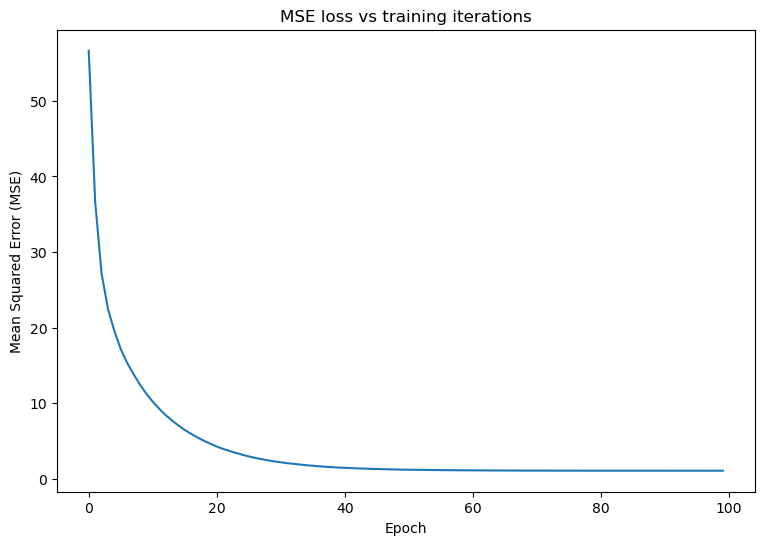

In [33]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g,v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)
  # Keep track of model loss per epoch
  loss = mse_loss(quad_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

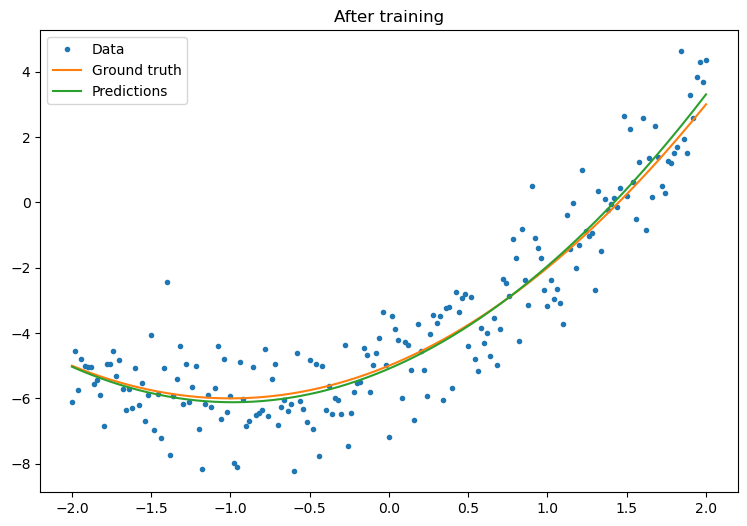

In [34]:
plot_preds(x, y, f, quad_model, 'After training')

In [35]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)])

In [36]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

new_model.save('./my_new_model')

2023-02-17 18:39:38.989499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ./my_new_model/assets


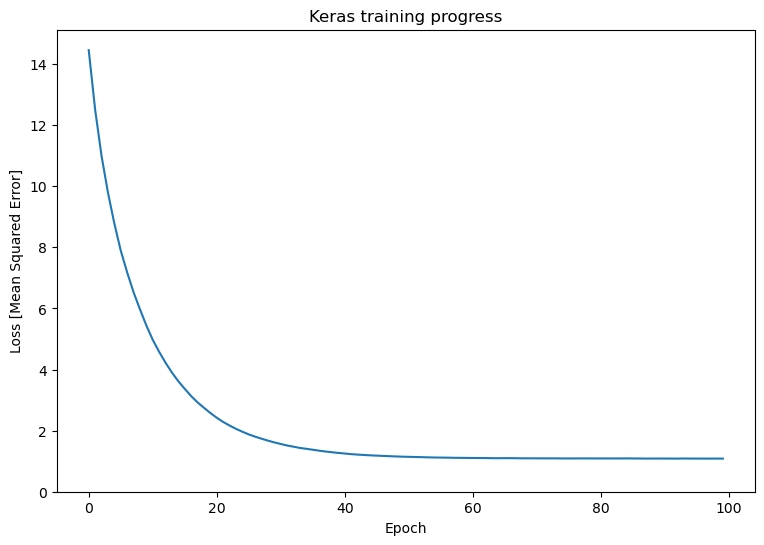

In [37]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

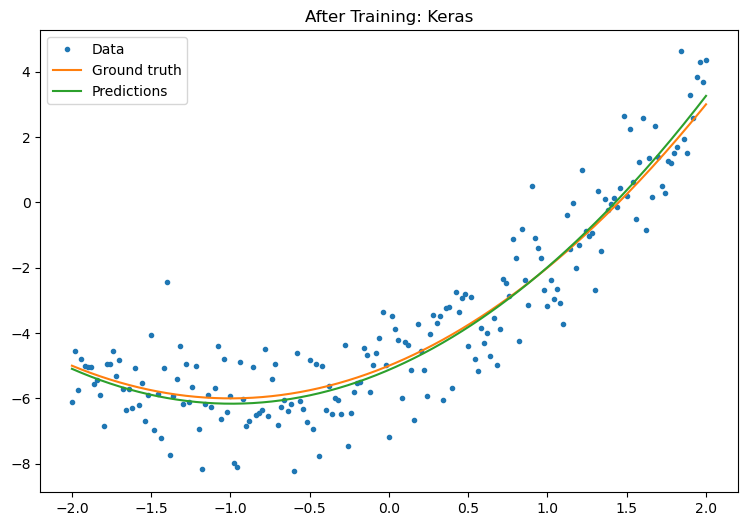

In [38]:
plot_preds(x, y, f, new_model, 'After Training: Keras')